# American Sign Language (ASL) Classifier using CNN

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image

np.random.seed(1)
tf.random.set_seed(2)

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Helper Functions

In [2]:
 def load_data(train_path,test_path):
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)

    X_train = train.drop('label',axis=1).to_numpy().reshape(27455,28,28).astype('float32')/255
    y_train = train['label']

    X_test = test.drop('label',axis=1).to_numpy().reshape(7172,28,28).astype('float32')/255
    y_test = test['label']

    return X_train, y_train, X_test, y_test

def to_char(num):
    return chr(num+65)

def one_hot_encode(data,num_classes):
    return keras.utils.to_categorical(data,num_classes)

def test(path):
    img_path = path
    img = image.load_img(img_path, target_size=(28,28,1),grayscale=True)
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    x = x/255.0
    plt.imshow(img,cmap='gray')
    prediction = model.predict(x)
    plt.title("Letter: "+to_char(np.argmax(prediction)));

Loading the data

In [3]:
train_path = '/content/drive/MyDrive/Projects/Sign_Language_Classifier/data/sign_mnist_train.csv'
test_path = '/content/drive/MyDrive/Projects/Sign_Language_Classifier/data/sign_mnist_test.csv'

X_train, y_train, X_test, y_test = load_data(train_path,test_path)
print('X train shape: ',X_train.shape)
print('y train shape: ',y_train.shape)
print('X test shape: ',X_test.shape)
print('y test shape: ',y_test.shape)

X train shape:  (27455, 28, 28)
y train shape:  (27455,)
X test shape:  (7172, 28, 28)
y test shape:  (7172,)


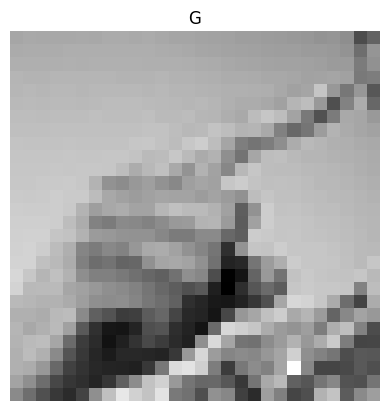

In [4]:
rand_num = random.randint(0,24)
plt.imshow(X_train[rand_num],cmap='gray')
plt.title(to_char(y_train[rand_num]))
plt.axis('off');

In [5]:
num_classes = 25
y_train = one_hot_encode(y_train,num_classes)
y_test = one_hot_encode(y_test,num_classes)

In [6]:
y_train[rand_num]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Model
The model is simple sequential model. The layers are:
Conv2D×2 → MaxPool → Conv2D×2 → MaxPool → Dense(512) → Dense(25)

In [15]:
model = Sequential([
    Conv2D(32,(3,3),padding='same',input_shape=(28,28,1)),
    Activation('relu'),
    Conv2D(32,(3,3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),

    Conv2D(64,(3,3),padding='same'),
    Activation('relu'),
    Conv2D(64,(3,3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(512),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 activation_6 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                      

In [17]:
opt = keras.optimizers.legacy.RMSprop(lr=0.00005, decay=1e-6)

model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train, batch_size=32, epochs=15, validation_data=(X_test,y_test),shuffle=True)

Epoch 1/15
858/858 [==============================] - 6s 6ms/step - loss: 3.1453 - accuracy: 0.0696 - val_loss: 2.9714 - val_accuracy: 0.2096
Epoch 2/15
858/858 [==============================] - 6s 7ms/step - loss: 2.4436 - accuracy: 0.2688 - val_loss: 1.7569 - val_accuracy: 0.4918
Epoch 3/15
858/858 [==============================] - 5s 6ms/step - loss: 1.6405 - accuracy: 0.4911 - val_loss: 1.1842 - val_accuracy: 0.6248
Epoch 4/15
858/858 [==============================] - 5s 6ms/step - loss: 1.1592 - accuracy: 0.6256 - val_loss: 0.8665 - val_accuracy: 0.7100
Epoch 5/15
858/858 [==============================] - 6s 7ms/step - loss: 0.8483 - accuracy: 0.7183 - val_loss: 0.6475 - val_accuracy: 0.7773
Epoch 6/15
858/858 [==============================] - 5s 6ms/step - loss: 0.6152 - accuracy: 0.7918 - val_loss: 0.4863 - val_accuracy: 0.8270
Epoch 7/15
858/858 [==============================] - 5s 6ms/step - loss: 0.4665 - accuracy: 0.8442 - val_loss: 0.3685 - val_accuracy: 0.8696
Epoch 

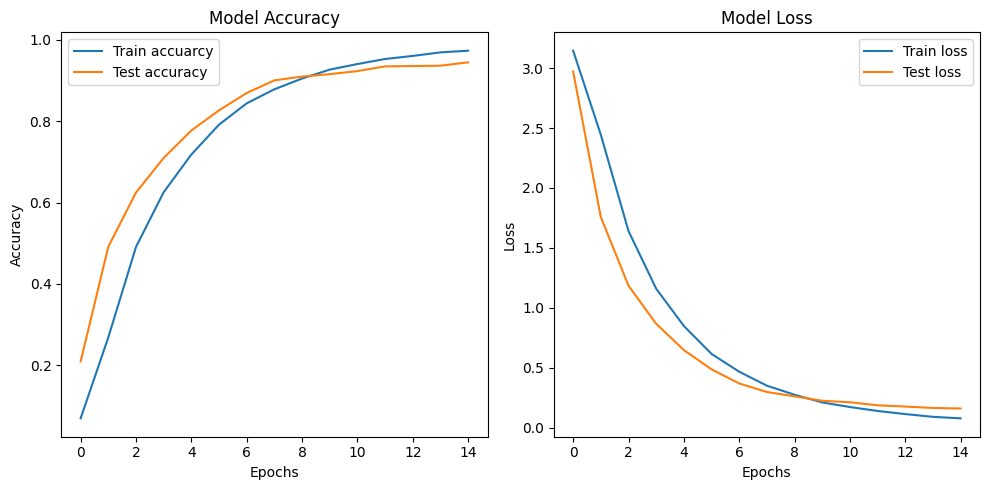

In [19]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train accuarcy','Test accuracy'])

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train loss','Test loss'])
plt.tight_layout()

Saving the model

In [20]:
model.save('ASLClassifier.h5')

Testing the model on data from the Internet

1/1 [==============================] - 0s 75ms/step


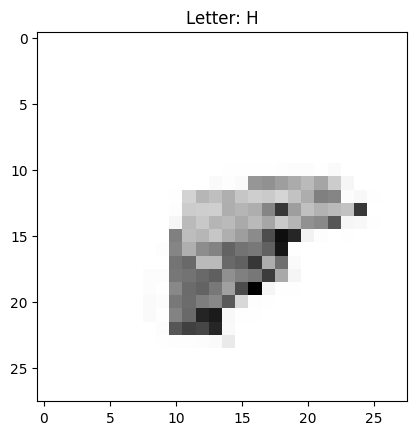

In [21]:
test('/content/H.jpg')

1/1 [==============================] - 0s 17ms/step


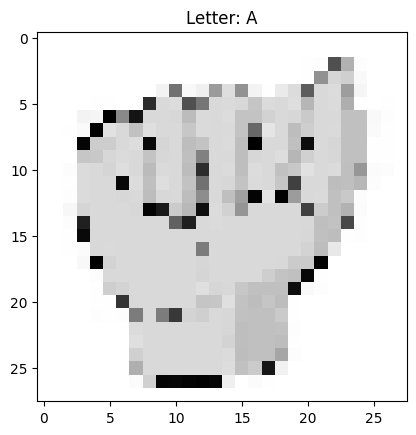

In [22]:
test('/content/A.jpg')